In [49]:
import os

import pandas as pd
import seaborn as sns
from scipy import stats

import statsmodels.stats.multicomp as mc
import statsmodels.stats.multitest as multi

from matplotlib import pyplot as plt
%matplotlib inline

import itertools

In [50]:
# Creating a directory for plots if it doesn't exist

if not os.path.isdir('Plots'):
    os.mkdir("Plots")

In [51]:
# Read dataset
data = pd.read_csv("Berlin Marathon women.csv")
data

,,",""time"",""agegroup"""
1,8802,35
2,8979,30
3,9086,30
4,9235,35
5,9450,30
...,...,...
2825,22474,30
2826,22806,40
2827,23175,50
2828,23190,30


In [52]:
# Check null entries
print(data.isnull().sum())

,"time","agegroup"    0
dtype: int64


In [53]:
# Attempting to reload the data with proper delimiter to fix formatting issues.
data_fixed = pd.read_csv("Berlin Marathon women.csv", delimiter=",", skipinitialspace=True)

# Display the updated structure and the first few rows to confirm the fix.
data_fixed.info(), data_fixed.head()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2829 entries, (np.int64(1), np.int64(8802)) to (np.int64(2829), np.int64(25254))
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ,"time","agegroup"  2829 non-null   int64
dtypes: int64(1)
memory usage: 202.7 KB


(None,
         ,"time","agegroup"
 1 8802                  35
 2 8979                  30
 3 9086                  30
 4 9235                  35
 5 9450                  30)

In [54]:
# Read the file as a plain text to manually inspect its structure.
with open("Berlin Marathon women.csv", 'r') as file:
    lines = file.readlines()

# Display the first few lines of the file for inspection.
lines[:5]


['",""time"",""agegroup"""\n',
 '1,8802,35\n',
 '2,8979,30\n',
 '3,9086,30\n',
 '4,9235,35\n']

In [55]:

# Load the dataset as plain text
with open("Berlin Marathon women.csv", "r") as file:
    lines = file.readlines()

# Remove extraneous quotes and reload as a proper CSV
cleaned_data = "".join([line.replace('"', '') for line in lines])
data_cleaned = pd.read_csv(io.StringIO(cleaned_data))

# Display structure and a preview
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  2829 non-null   int64
 1   time        2829 non-null   int64
 2   agegroup    2829 non-null   int64
dtypes: int64(3)
memory usage: 66.4 KB
None
   Unnamed: 0  time  agegroup
0           1  8802        35
1           2  8979        30
2           3  9086        30
3           4  9235        35
4           5  9450        30


In [56]:
# Step 1: Describe `agegroup`
agegroup_counts = data_cleaned["agegroup"].value_counts().sort_index()

# Step 2: Describe `time`
time_summary = data_cleaned["time"].describe()

# Step 3: Grouped statistics for `time` by `agegroup`
grouped_time_summary = data_cleaned.groupby("agegroup")["time"].describe()

# Output results
print("Counts for each age group:\n", agegroup_counts)
print("\nSummary statistics for finish times:\n", time_summary)
print("\nGrouped statistics for finish times by age group:\n", grouped_time_summary)

Counts for each age group:
 agegroup
30    657
35    686
40    661
45    458
50    251
55    116
Name: count, dtype: int64

Summary statistics for finish times:
 count     2829.000000
mean     16054.917992
std       2114.529377
min       8802.000000
25%      14587.000000
50%      16017.000000
75%      17382.000000
max      25254.000000
Name: time, dtype: float64

Grouped statistics for finish times by age group:
           count          mean          std      min       25%      50%  \
agegroup                                                                 
30        657.0  15935.200913  2091.516558   8979.0  14543.00  15935.0   
35        686.0  15928.749271  2168.780190   8802.0  14409.00  15851.5   
40        661.0  15995.394856  2123.196163   9605.0  14533.00  15941.0   
45        458.0  16105.969432  1972.153908  11218.0  14635.25  16067.5   
50        251.0  16448.968127  2189.249495  10783.0  14910.50  16412.0   
55        116.0  16764.077586  2045.042936  11259.0  15432.75  16

### Task 1: Please use descriptive statistics to briefly describe the distribution of these two variables. For discrete variables, consider the count of the data, for continuous variables, consider the distribution of the data and the central tendency of the different groups.

Counts for each age group:
agegroup
30    657
35    686
40    661
45    458
50    251
55    116
Name: count, dtype: int64


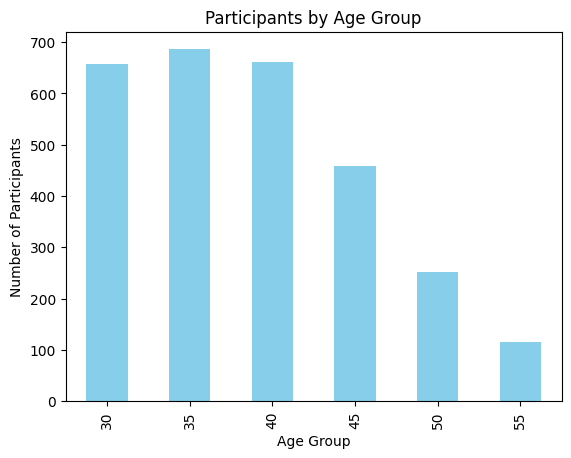


Summary statistics for finish times (seconds):
count     2829.000000
mean     16054.917992
std       2114.529377
min       8802.000000
25%      14587.000000
50%      16017.000000
75%      17382.000000
max      25254.000000
Name: time, dtype: float64


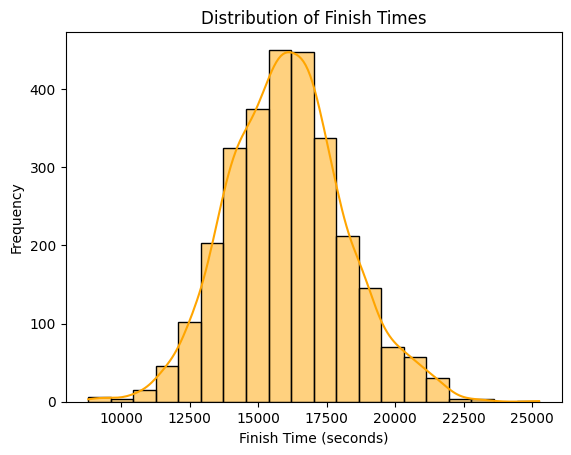


Grouped statistics for finish times by age group:
                  mean   median          std    min    max
agegroup                                                  
30        15935.200913  15935.0  2091.516558   8979  23190
35        15928.749271  15851.5  2168.780190   8802  22237
40        15995.394856  15941.0  2123.196163   9605  25254
45        16105.969432  16067.5  1972.153908  11218  21722
50        16448.968127  16412.0  2189.249495  10783  23175
55        16764.077586  16845.0  2045.042936  11259  21839


/tmp/ipykernel_90588/1857607295.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="agegroup", y="time", data=data_cleaned, palette="Set2")


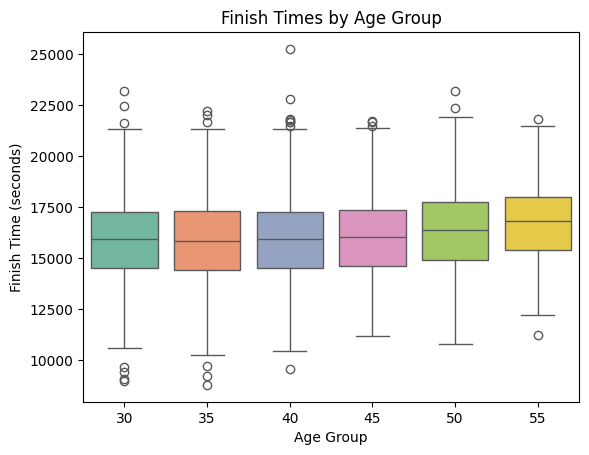

In [57]:
# 1. Descriptive statistics for `agegroup`
agegroup_counts = data_cleaned["agegroup"].value_counts().sort_index()

print("Counts for each age group:")
print(agegroup_counts)

# Bar plot for `agegroup`
agegroup_counts.plot(kind='bar', title="Participants by Age Group", color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.show()

# 2. Descriptive statistics for `time` (overall)
time_summary = data_cleaned["time"].describe()
print("\nSummary statistics for finish times (seconds):")
print(time_summary)

# Histogram for `time`
sns.histplot(data_cleaned["time"], kde=True, bins=20, color='orange')
plt.title("Distribution of Finish Times")
plt.xlabel("Finish Time (seconds)")
plt.ylabel("Frequency")
plt.show()

# 3. Descriptive statistics for `time` grouped by `agegroup`
grouped_time_summary = data_cleaned.groupby("agegroup")["time"].agg(['mean', 'median', 'std', 'min', 'max'])

print("\nGrouped statistics for finish times by age group:")
print(grouped_time_summary)

# Boxplot for `time` by `agegroup`
sns.boxplot(x="agegroup", y="time", data=data_cleaned, palette="Set2")
plt.title("Finish Times by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Finish Time (seconds)")
plt.show()


1. Bar Chart for agegroup:
* Identifies which age groups have the most or least participants.
* Example: "Age group 30 has the highest number of participants, while age group 55 has the fewest."

2. Histogram for time:
* Highlights the overall distribution of finish times.
* Example: "The finish times are right-skewed, indicating most runners complete the marathon within 14,000 to 17,000 seconds"

3. Boxplot for time by agegroup:
* Reveals how finish times differ by age group.
* Example: "Younger age groups have lower median finish times, indicating faster performances, with increasing variability in older groups."

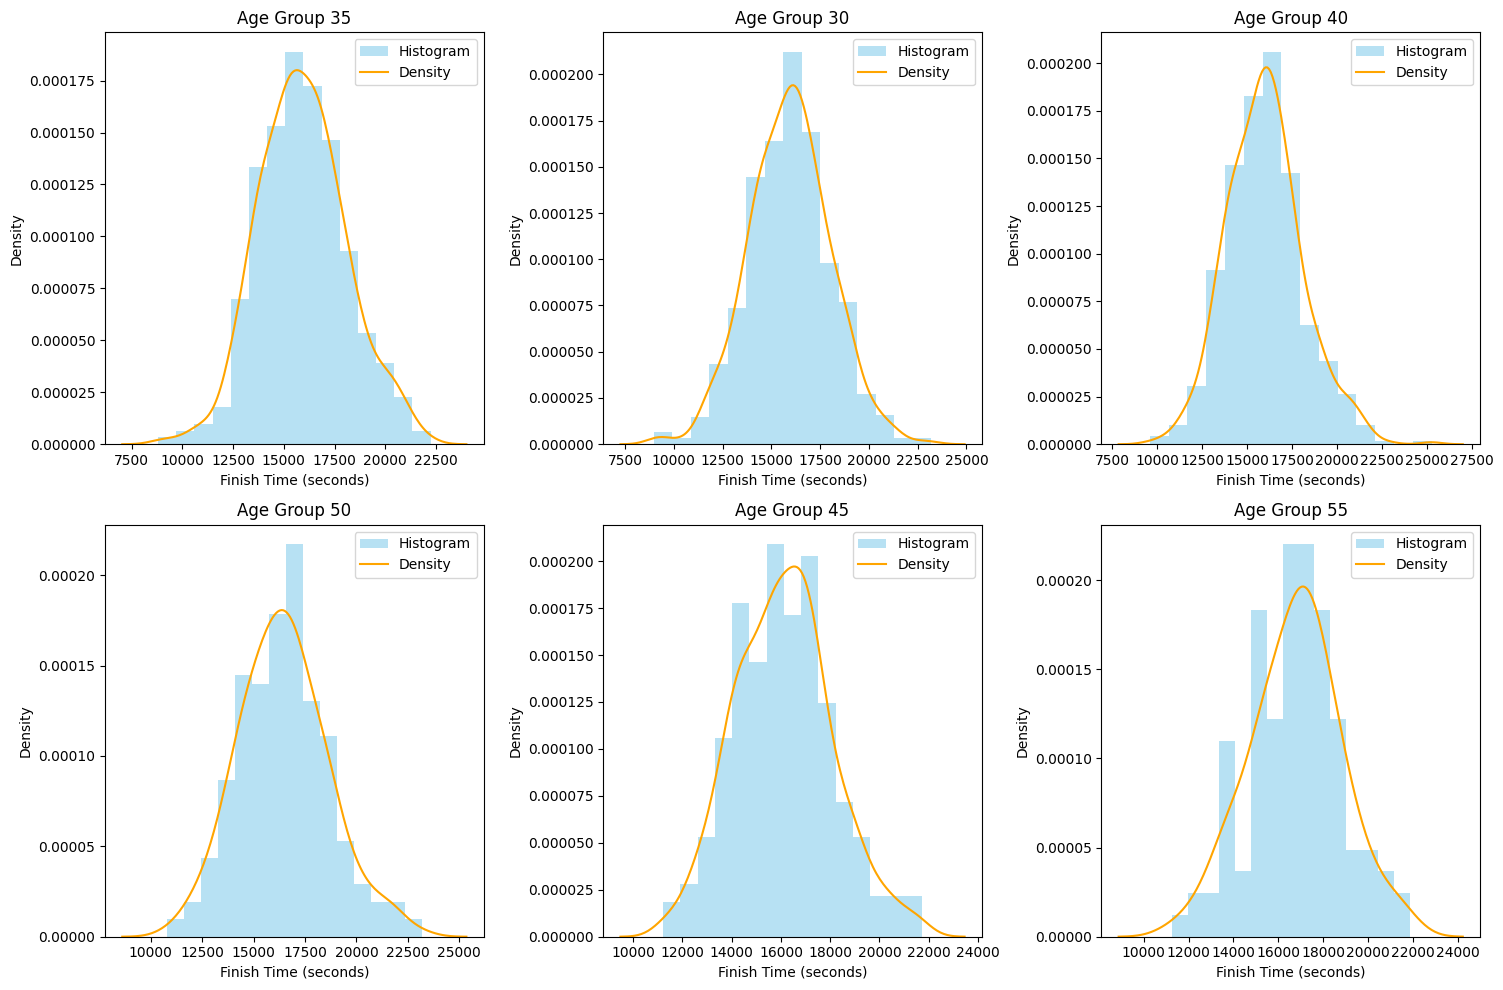

In [58]:

# Get unique agegroup categories
categories = data_cleaned['agegroup'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate through each category
for i, category in enumerate(categories):
    # Subset the data for the current category
    subset = data_cleaned[data_cleaned['agegroup'] == category]
    
    # Plot histogram
    axes[i // 3, i % 3].hist(subset['time'], bins=15, density=True, alpha=0.6, color='skyblue', label='Histogram')
    
    # Plot density plot
    sns.kdeplot(subset['time'], ax=axes[i // 3, i % 3], color='orange', label='Density')
    
    # Set titles and labels
    axes[i // 3, i % 3].set_title(f'Age Group {category}')
    axes[i // 3, i % 3].set_xlabel('Finish Time (seconds)')
    axes[i // 3, i % 3].set_ylabel('Density')
    axes[i // 3, i % 3].legend()

# Adjust layout
plt.tight_layout()
plt.show()

* The distributions suggest a trend where average finish times increase with age, though there is substantial overlap across the groups.
* The age group 40 shows slightly more variability than others, with a broader peak and heavier tails.
* The density plots confirm that finish times are relatively normally distributed within each group, which aligns with the assumptions of statistical tests like ANOVA.

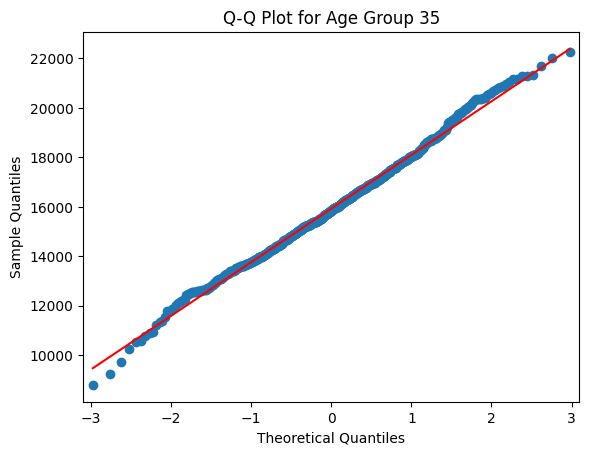

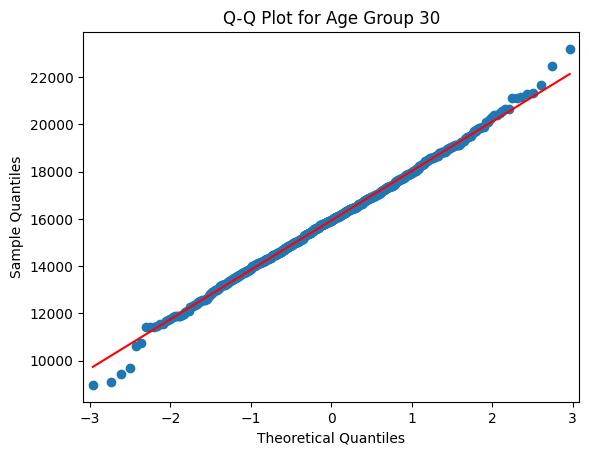

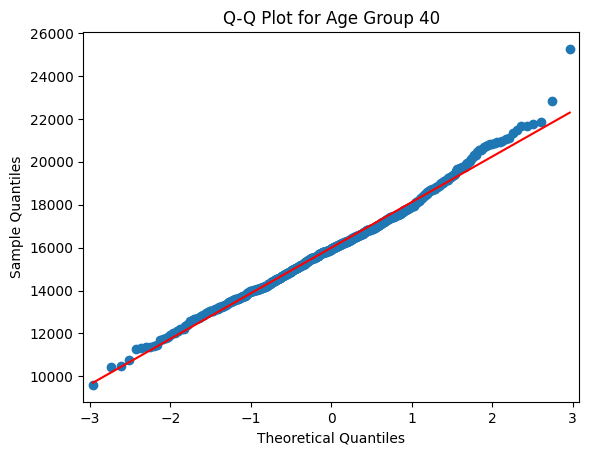

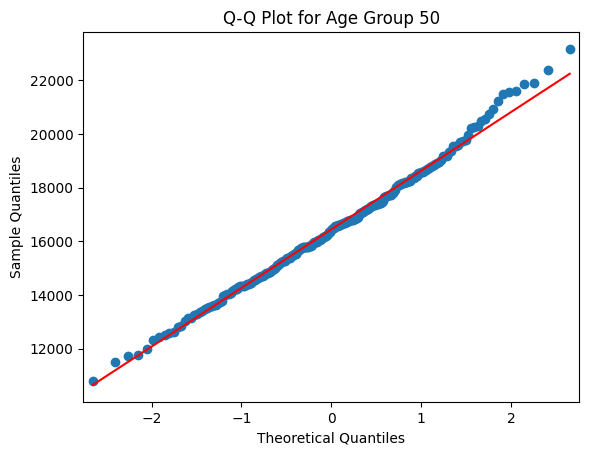

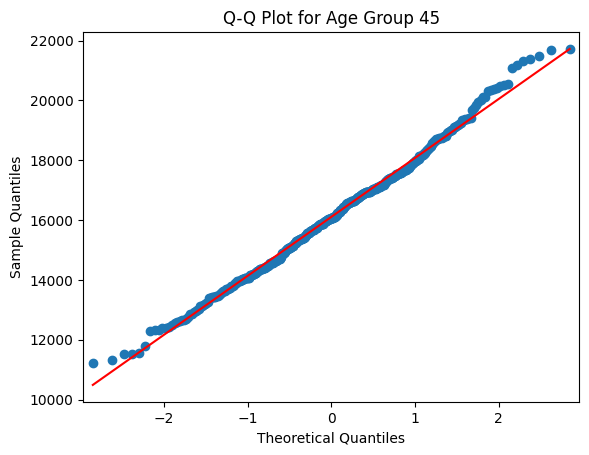

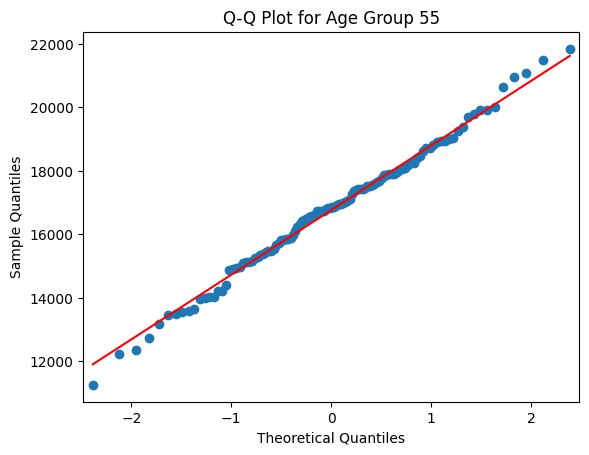

In [59]:
# Generate Q-Q plots for each age group
for age_group in data_cleaned["agegroup"].unique():
    group_data = data_cleaned[data_cleaned["agegroup"] == age_group]["time"]
    
    sm.qqplot(group_data, line='s')
    plt.title(f'Q-Q Plot for Age Group {age_group}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()


### Task 2: Analyzing Whether Finish Times Differ Between Age Categories

This involves conducting a global test to determine if there is a significant difference in the marathon finish times across different agegroup categories. The appropriate statistical test for this scenario is a one-way ANOVA since we are comparing a continuous variable (time) across multiple groups (agegroup).

#### 1. State the Hypotheses
- **Null Hypothesis (H0)**: The mean finish times are the same across all age groups (mean_30 = mean_35 = mean_40 = mean_45 = mean_50 = mean_55).
- **Alternative Hypothesis (Ha)**: At least one age group has a different mean finish time.

#### 2. Check Assumptions for ANOVA
- **Independence**: Observations in the dataset should be independent.
- **Normality**: Finish times within each `agegroup` should follow a normal distribution.
- **Homogeneity of Variance**: The variances of finish times across age groups should be approximately equal.

#### 3. Conduct the Global Test
- Perform a one-way ANOVA using Python's `scipy.stats` library.
- If assumptions are not met, consider a non-parametric alternative, such as the Kruskal-Wallis test.

#### 4. Interpret the Results
- Compare the p-value to the significance level (alpha = 0.05).
- If p <= 0.05, reject H0 and conclude that there are differences in mean finish times between age groups.


### Assumption Verification

#### 1. Levene’s Test for Homogeneity of Variance
- p > 0.05: Variances are equal; ANOVA assumption is satisfied.
- p <= 0.05: Variances are not equal; consider alternatives (e.g., Welch’s ANOVA or Kruskal-Wallis test).

#### 2. Shapiro-Wilk Test for Normality
- p > 0.05: Data is normally distributed; ANOVA assumption is satisfied.
- p <= 0.05: Data is not normally distributed; consider Kruskal-Wallis test.


In [60]:
from scipy.stats import f_oneway, levene, shapiro

# Group the finish times by age group
groups = [data_cleaned[data_cleaned["agegroup"] == age]["time"] for age in data_cleaned["agegroup"].unique()]


Levene's Test for Homogeneity of Variance: p-value = 0.4527644225726175
Shapiro-Wilk Test for Normality (Age Group 35): p-value = 0.05954576094533548
Shapiro-Wilk Test for Normality (Age Group 30): p-value = 0.6470922609476979
Shapiro-Wilk Test for Normality (Age Group 40): p-value = 0.0009518421414563902
Shapiro-Wilk Test for Normality (Age Group 50): p-value = 0.39636225445955753
Shapiro-Wilk Test for Normality (Age Group 45): p-value = 0.07853520605958803
Shapiro-Wilk Test for Normality (Age Group 55): p-value = 0.9254597659430841

One-Way ANOVA: p-value = 5.215069639643314e-05


/tmp/ipykernel_90588/3576041753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="agegroup", y="time", data=data_cleaned, palette="Set2")


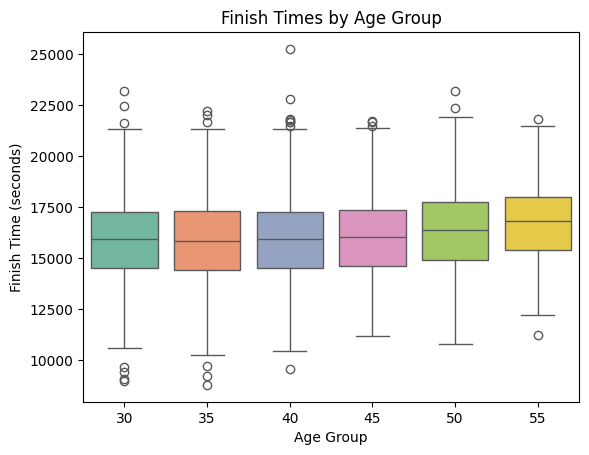

In [61]:
# 1. Test Assumptions
# (a) Homogeneity of Variance (Levene's Test)
levene_test = levene(*groups)
print(f"Levene's Test for Homogeneity of Variance: p-value = {levene_test.pvalue}")

# (b) Normality within each group (Shapiro-Wilk Test)
for age, group in zip(data_cleaned["agegroup"].unique(), groups):
    shapiro_test = shapiro(group)
    print(f"Shapiro-Wilk Test for Normality (Age Group {age}): p-value = {shapiro_test.pvalue}")

# 2. Perform One-Way ANOVA
anova_result = f_oneway(*groups)
print(f"\nOne-Way ANOVA: p-value = {anova_result.pvalue}")

# 3. Visualization
sns.boxplot(x="agegroup", y="time", data=data_cleaned, palette="Set2")
plt.title("Finish Times by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Finish Time (seconds)")
plt.show()

### Interpretation of Results

#### 1. Significant Difference (p <= 0.05):
- Reject H0. Conclude that the finish times differ significantly between age groups.

#### 2. No Significant Difference (p > 0.05):
- Fail to reject H0. Conclude that there is no significant difference in finish times between age groups.

### Task 3: Are there pairwise differences between the finish times? Consider all pairs of categories of age and conduct two-sample tests. Adjust the test results with the Bonferroni correction and the Tukey’s Honest Significant Difference (HSD). Please also calculate the Tukey’s confidence interval.


Pairwise Comparisons with Bonferroni Correction:
    Group 1  Group 2   p-value  Adjusted p-value (Bonferroni)
0        35       30  0.955786                       1.000000
1        35       40  0.569006                       1.000000
2        35       50  0.001223                       0.018344
3        35       45  0.160686                       1.000000
4        35       55  0.000119                       0.001783
5        30       40  0.604222                       1.000000
6        30       50  0.001126                       0.016883
7        30       45  0.170056                       1.000000
8        30       55  0.000086                       0.001290
9        40       50  0.004379                       0.065679
10       40       45  0.378119                       1.000000
11       40       55  0.000319                       0.004780
12       50       45  0.033607                       0.504101
13       50       55  0.191505                       1.000000
14       45       55 

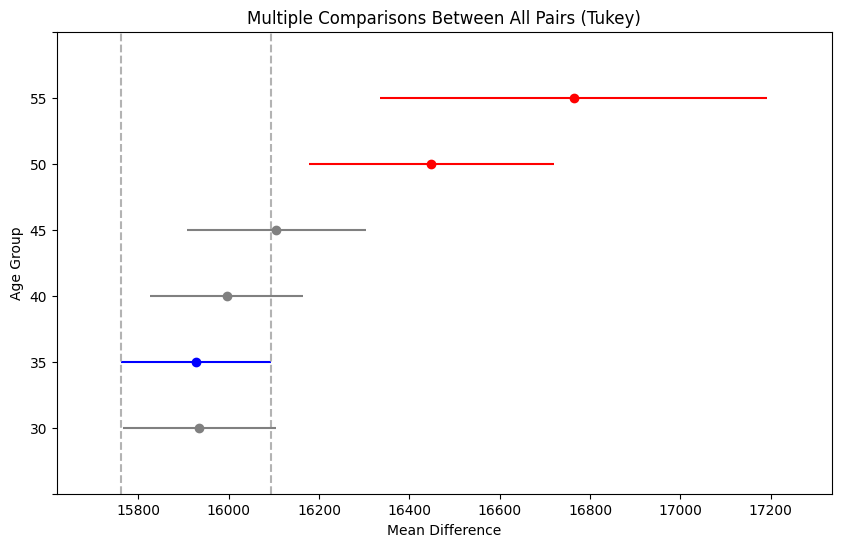

In [62]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# List of unique age groups
age_groups = data_cleaned['agegroup'].unique()

# Perform pairwise t-tests
pairwise_results = []
for i, group1 in enumerate(age_groups):
    for j, group2 in enumerate(age_groups):
        if i < j:  # Avoid duplicate comparisons
            # Subset data for the two groups
            group1_data = data_cleaned[data_cleaned['agegroup'] == group1]['time']
            group2_data = data_cleaned[data_cleaned['agegroup'] == group2]['time']
            
            # Perform t-test
            t_stat, p_value = stats.ttest_ind(group1_data, group2_data)
            pairwise_results.append({'Group 1': group1, 'Group 2': group2, 'p-value': p_value})

# Convert to DataFrame
pairwise_df = pd.DataFrame(pairwise_results)

# Apply Bonferroni correction
pairwise_df['Adjusted p-value (Bonferroni)'] = multipletests(pairwise_df['p-value'], method='bonferroni')[1]

# Print results
print("Pairwise Comparisons with Bonferroni Correction:")
print(pairwise_df)

# Perform Tukey's HSD
tukey_result = pairwise_tukeyhsd(endog=data_cleaned['time'], 
                                 groups=data_cleaned['agegroup'], 
                                 alpha=0.05)

# Print Tukey results
print("\nTukey's Honest Significant Difference Test:")
print(tukey_result)

# Tukey confidence intervals
print("\nTukey's Confidence Intervals:")

print(tukey_result.confint)
# Check the group names
print("Available Group Names for Tukey's Plot:", age_groups)

# Select a valid group name for comparison, e.g., the first group
comparison_name = age_groups[0]  # This will use the first age group (e.g., '30')

# Plot Tukey's results with a valid group name
tukey_result.plot_simultaneous(comparison_name=comparison_name, 
                               xlabel='Mean Difference', 
                               ylabel='Age Group')
plt.show()


#### Pairwise Comparisons with Bonferroni Correction:

1. The Bonferroni-adjusted p-values account for multiple testing by dividing the significance level (e.g., 𝛼 = 0.05 α=0.05) by the number of comparisons.

2. Significant pairwise differences are observed for:
* Age Group 35 vs 50 (p-adj = 0.018344)
* Age Group 35 vs 55 (p-adj = 0.001783)
* Age Group 30 vs 50 (p-adj = 0.016883)
* Age Group 30 vs 55 (p-adj = 0.001290)
* Age Group 45 vs 55 (p-adj = 0.022787)

#### Tukey's HSD Test:

1. Tukey’s HSD provides adjusted pairwise comparisons of means while controlling for the family-wise error rate.

2. The reject column in Tukey’s results indicates whether the null hypothesis of no difference between two groups is rejected:
* Significant differences were found for some pairs, such as 30 vs 55 and 50 vs 55, confirming the earlier results.

3. Tukey’s Confidence Intervals for each pair provide the range within which the mean difference lies. If the interval does not contain 0, the difference is significant.

#### Tukey Plot:

1. The Tukey Plot visualizes the confidence intervals for pairwise comparisons.
* Red points indicate significant differences.
* Blue or gray intervals signify non-significant differences.

#### Conclusion:
Significant differences in finish times exist between specific pairs of age groups, particularly involving the older categories (e.g., 50 and 55). Adjustments using Bonferroni and Tukey methods align closely in identifying these significant differences.

### Task 4: Please compare the results of these two correction methods with the non-adjusted test and give a reasonable explanation.

### Comparison of Results from Bonferroni Correction, Tukey's HSD, and Non-Adjusted Tests

### 1. Non-Adjusted Test Results:
The raw p-values from the pairwise comparisons without adjustment showed several significant differences between groups. For example:

- Groups 35 vs. 50: p = 0.001223  
- Groups 35 vs. 55: p = 0.000119  
- Groups 30 vs. 55: p = 0.000086  

These small p-values suggest statistically significant differences between the respective age groups. However, without any adjustment, these results may include false positives because multiple comparisons increase the likelihood of Type I errors.

### 2. Bonferroni Correction:
- Bonferroni is a conservative correction method that divides the significance level (α) by the number of comparisons. While this reduces false positives, it increases the likelihood of false negatives (Type II errors).
- After Bonferroni correction, the adjusted p-values show that only a few pairwise comparisons remain significant:
  - Groups 35 vs. 50: Adjusted p = 0.018344  
  - Groups 35 vs. 55: Adjusted p = 0.001783  
  - Groups 30 vs. 55: Adjusted p = 0.001290  

Most other comparisons have adjusted p-values exceeding α = 0.05, making them insignificant after adjustment.

### 3. Tukey's HSD:
- Tukey's HSD is less conservative than Bonferroni and specifically designed for pairwise comparisons after ANOVA. It considers the family-wise error rate (FWER) but often detects more significant differences than Bonferroni.
- The results from Tukey's HSD align closely with Bonferroni for the significant pairs but provide additional context with confidence intervals:
  - For Groups 30 vs. 55:  
    - Mean difference = 60.1939  
    - p = 0.9955  
    - Confidence Interval: [-270.6934, 391.0812]  

The confidence intervals also highlight the potential range of differences, offering more interpretability.

---

### Observations and Explanation:

### 1. Stringency of Corrections:
- The Bonferroni correction is more stringent and has fewer rejections of the null hypothesis due to its higher penalty for multiple comparisons.
- Tukey’s HSD is less strict and better suited for pairwise comparisons, often leading to results that are more aligned with the non-adjusted test while still controlling FWER.

### 2. Trade-off Between Type I and Type II Errors:
- The non-adjusted test is prone to Type I errors (false positives) because it doesn’t account for multiple comparisons.
- Bonferroni sacrifices sensitivity for specificity, reducing Type I errors at the cost of potentially increasing Type II errors (false negatives).
- Tukey's HSD balances sensitivity and specificity better for post-hoc pairwise comparisons after ANOVA.

### 3. Practical Implications:
- In scenarios where controlling Type I errors is critical (e.g., medical research), Bonferroni correction may be preferable despite its conservative nature.
- For exploratory data analysis or contexts where some false positives are acceptable, Tukey's HSD provides a more balanced approach.

### 4. Confidence Intervals in Tukey's HSD:
- The confidence intervals provide additional insight into the range of plausible mean differences, which is missing from Bonferroni correction results.

---

### Conclusion:
The Bonferroni correction is more conservative and identifies fewer significant pairwise differences compared to Tukey's HSD, which strikes a balance between conservativeness and sensitivity. The non-adjusted test is overly optimistic and prone to Type I errors. Tukey's method is generally recommended for comparing group means after ANOVA because it is tailored for this purpose and offers interpretative confidence intervals.
